<a href="https://colab.research.google.com/github/stevegeorge2002/Landmark-Detection/blob/main/Landmark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Lens Web Application for Landmark Detection
## Steve George

# Installation

In [ ]:
!pip install gradio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import gradio as gr
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

# **Load the model**

In [ ]:
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_URL = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
IMAGE_SHAPE = (321, 321)

In [ ]:
classifier = tf.keras.Sequential([hub.KerasLayer(TF_MODEL_URL,
                                                 input_shape=IMAGE_SHAPE+(3,),
                                                 output_key="predictions:logits")])

In [ ]:
df = pd.read_csv(LABEL_MAP_URL)

In [ ]:
label_map = dict(zip(df.id, df.name))

In [ ]:
img_loc = "Gateway Of India.jpg"

In [ ]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

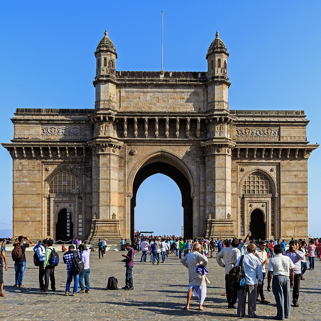

In [ ]:
img

In [ ]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [ ]:
img = img[np.newaxis, ...]

In [ ]:
img.shape

(1, 321, 321, 3)

In [ ]:
result = classifier.predict(img)

1/1 [==============================] - 2s 2s/step


In [ ]:
result

array([[ 0.14954835,  0.20766364,  0.10613415, ...,  0.08580902,
        -0.0304329 ,  0.05532524]], dtype=float32)

In [ ]:
label_map[np.argmax(result)]

'Gateway Of India Mumbai'

# **Define prediction Function**

In [ ]:
class_names=list(label_map.values())

In [ ]:
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

**Build a shareable UI in 3 lines of code!**

In [ ]:
image = gr.Image()
label = gr.Label(num_top_classes=1)

gr.Interface(
    classify_image,
    image,
    label,
    ).launch(debug=True);

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://c353735ce7e3ae5c09.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 3s 3s/step
